##          THE ROLE OF MACHINE LEARNING IN MENTAL HEALTH(DEPRESSION)

In [1]:
#Importing the neccesary libraries needed
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import preprocessing
#pip install scikit-learn

#import sys
#!{sys.executable} -m pip install xgboost
#!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from joblib import load

from joblib import dump

import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
##from skopt import BayesSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#import itertools
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install catboost



In [2]:
#Imorting the data set
depression_rec = pd.read_csv(r"C:\Users\chukw\Downloads\archive (32)\b_depressed.csv")

In [3]:
#View of the first five rows
depression_rec.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [4]:
#This is used to view information about data type for neccesary conversions
depression_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

##          EXPLORATORY DATA ANALYSIS STEPS 

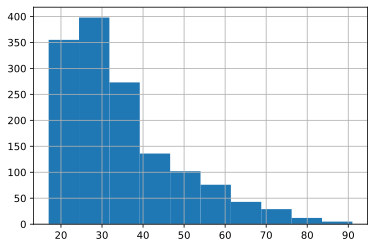

In [5]:
#Histogram view of the age distribution
hist_view = depression_rec['Age'].hist()

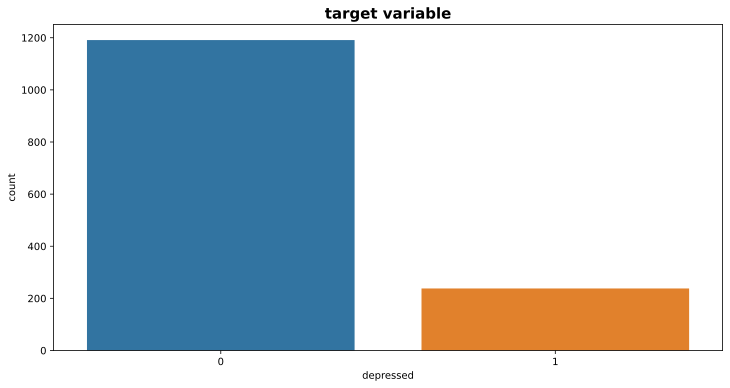

In [6]:
#A view of the Target column showing number of the depressed and not depressed
plt.figure(figsize=(12,6))
plt.title("target variable", fontsize=15, fontweight='bold', fontname='DejaVu Sans', ha='center')
ax = sns.countplot(x='depressed', data=depression_rec)

Text(0.5, 1.0, 'Distribution of Gender')

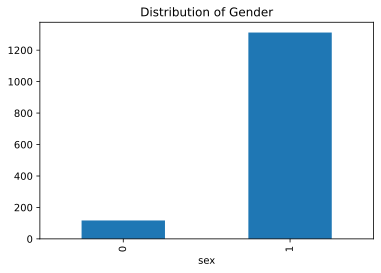

In [7]:
depression_rec.groupby('sex')['sex'].count().plot(kind='bar', y='Gender')
plt.title('Distribution of Gender')

<AxesSubplot:xlabel='depressed'>

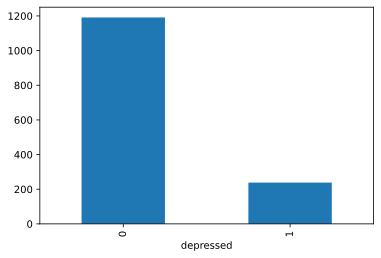

In [8]:
depression_rec.groupby('depressed')['depressed'].count().plot(kind='bar', y='Status')

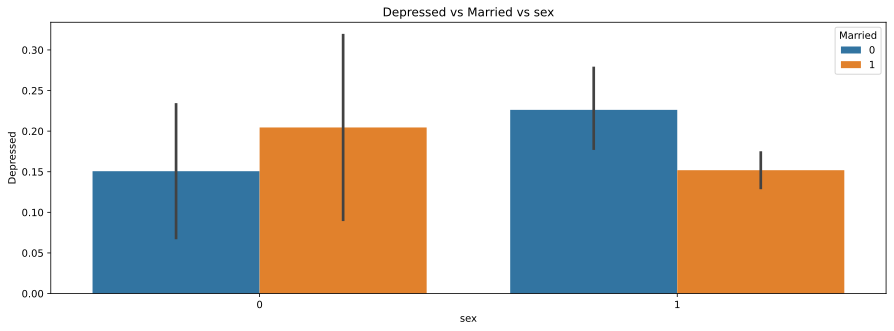

In [9]:
#Aplot of depressed against married and sex
plt.figure(figsize=(15,5))
sns.barplot(x='sex',y='depressed',hue='Married',data=depression_rec)
plt.title('Depressed vs Married vs sex')
plt.xlabel('sex')
plt.ylabel('Depressed')
plt.show()

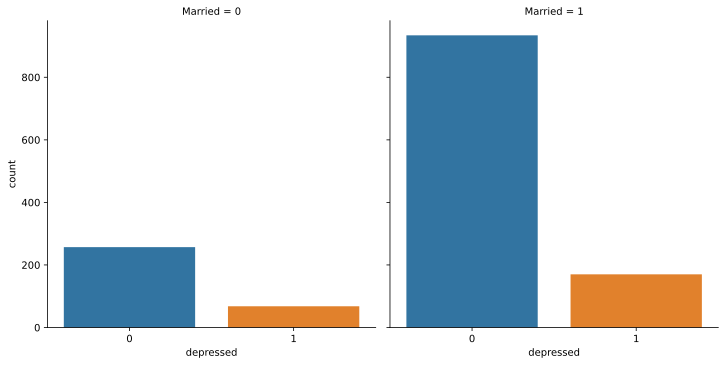

In [10]:
##Aplot of depression against Married
sns.catplot(x='depressed', col='Married', kind='count', data= depression_rec)

<AxesSubplot:xlabel='education_level'>

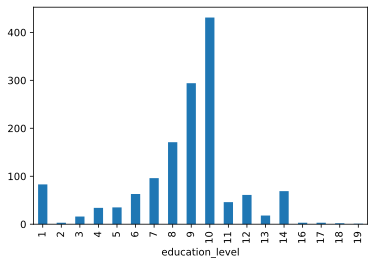

In [11]:
#Education level and depression plot
depression_rec.groupby('education_level')['depressed'].count().plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of depression by  sex')

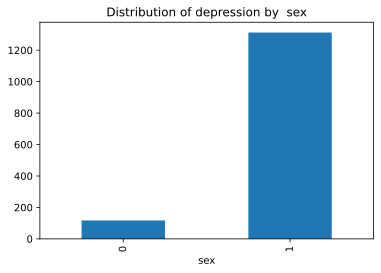

In [12]:
#A plot of distribution of depression by sex
depression_rec.groupby('sex')['depressed'].count().plot(kind = 'bar')
plt.title('Distribution of depression by  sex')

<AxesSubplot:xlabel='living_expenses', ylabel='Density'>

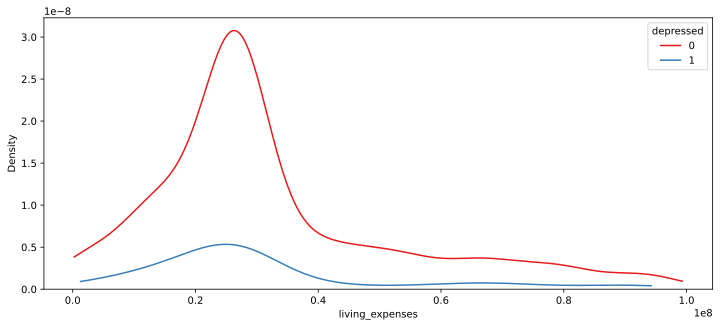

In [13]:
#This is a feature of the living expenses
plt.figure(figsize=(12, 5))
sns.kdeplot(data=depression_rec, x="living_expenses", hue="depressed",cut = 0,palette='Set1')

<AxesSubplot:xlabel='incoming_salary', ylabel='Density'>

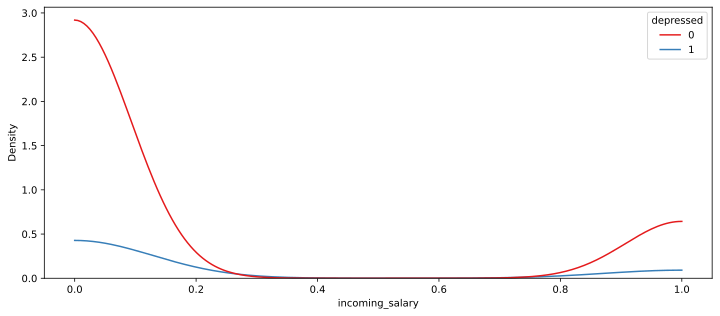

In [14]:
#This is a feature of a participants incoming salary
plt.figure(figsize=(12, 5))
sns.kdeplot(data=depression_rec, x="incoming_salary", hue="depressed",cut = 0,palette='Set1')

<AxesSubplot:xlabel='lasting_investment', ylabel='Density'>

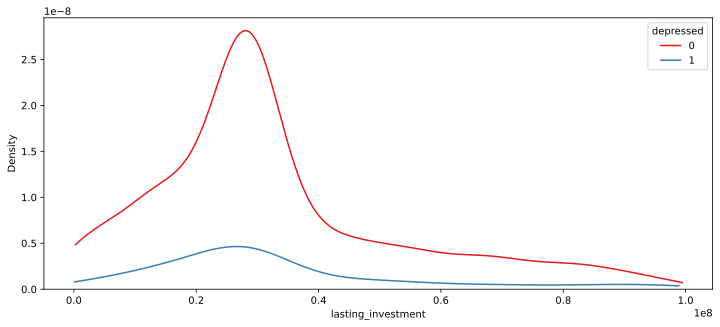

In [15]:
#This is a feature of the lasting investment
plt.figure(figsize=(12, 5))
sns.kdeplot(data=depression_rec, x="lasting_investment", hue="depressed",cut = 0,palette='Set1')

<AxesSubplot:xlabel='durable_asset', ylabel='Density'>

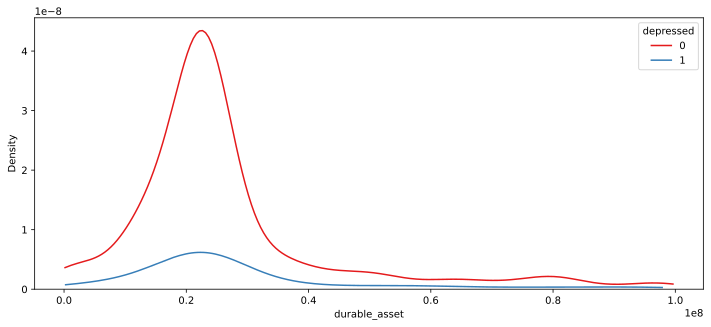

In [16]:
#This is a feature of the durable assets
plt.figure(figsize=(12, 5))
sns.kdeplot(data=depression_rec, x="durable_asset", hue="depressed",cut = 0,palette='Set1')

<AxesSubplot:>

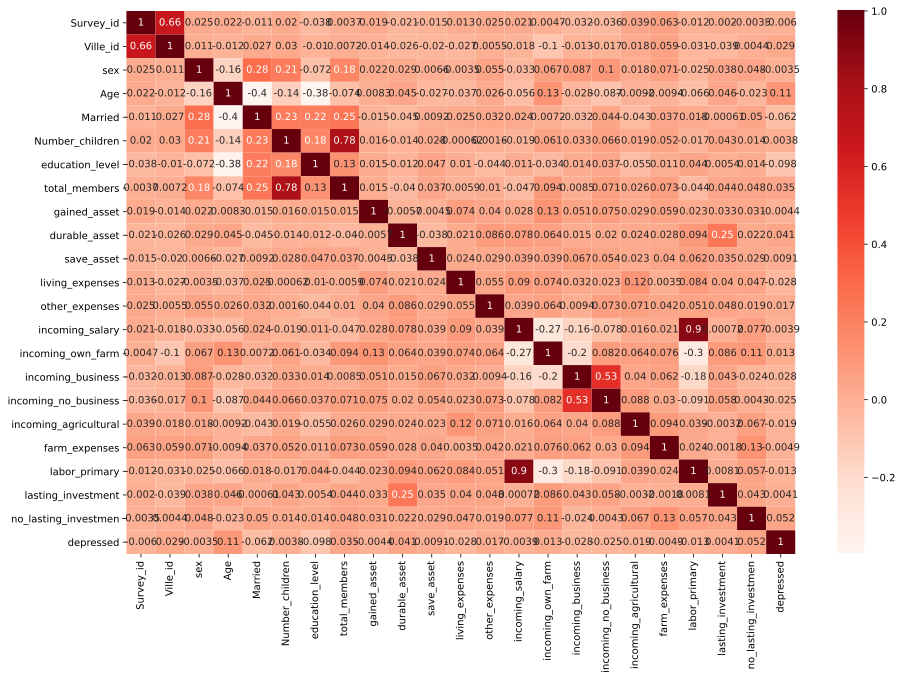

In [17]:
#correlation graaph showing all the columns and how they correlate with each other
corr = depression_rec.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap="Reds", annot=True)

##          DATA PREPROCESSING STEPS

In [18]:
#checking data set rows and columns
depression_rec.shape

(1429, 23)

In [19]:
#checking null values
depression_rec.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [20]:
#Using imputation to replace the null vaules with the median score
depression_rec['no_lasting_investmen'].fillna(depression_rec['no_lasting_investmen'].median(), inplace=True)

In [21]:
#checking null values
depression_rec.isna().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [22]:
#Feature selection is done by Removing some irrelivant columns
depression_rec = depression_rec.drop(['Ville_id', 'gained_asset','save_asset', 'farm_expenses', 'labor_primary','total_members'], axis=1)

In [23]:
#A view of data types and count
depression_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   sex                    1429 non-null   int64  
 2   Age                    1429 non-null   int64  
 3   Married                1429 non-null   int64  
 4   Number_children        1429 non-null   int64  
 5   education_level        1429 non-null   int64  
 6   durable_asset          1429 non-null   int64  
 7   living_expenses        1429 non-null   int64  
 8   other_expenses         1429 non-null   int64  
 9   incoming_salary        1429 non-null   int64  
 10  incoming_own_farm      1429 non-null   int64  
 11  incoming_business      1429 non-null   int64  
 12  incoming_no_business   1429 non-null   int64  
 13  incoming_agricultural  1429 non-null   int64  
 14  lasting_investment     1429 non-null   int64  
 15  no_l

In [24]:
#A view of the final data set
depression_rec.head(10)

,Survey_id,sex,Age,Married,Number_children,education_level,durable_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,lasting_investment,no_lasting_investmen,depressed
0,926,1,28,1,4,10,22861940,26692283,28203066,0,0,0,0,30028818,28411718,28292707.0,0
1,747,1,23,1,3,8,22861940,26692283,28203066,0,0,0,0,30028818,28411718,28292707.0,1
2,1190,1,22,1,3,9,22861940,26692283,28203066,0,0,0,0,30028818,28411718,28292707.0,0
3,1065,1,27,1,2,10,19698904,397715,44042267,0,1,0,1,22288055,7781123,69219765.0,0
4,806,0,59,0,4,10,17352654,80877619,74503502,1,0,0,0,53384566,20100562,43419447.0,0
5,483,1,35,1,6,10,736707,30696127,11531066,0,1,0,1,22688441,4442561,76629095.0,0
6,849,0,34,0,1,9,21925041,66730708,10890451,0,0,0,0,26692283,22562288,55608922.0,1
7,1386,1,21,1,2,10,20323505,80076849,58456101,0,0,1,0,9275569,33922659,54600174.0,0
8,930,1,32,1,7,9,25224208,30162281,67184479,1,0,0,0,32564587,14018381,15117619.0,0
9,390,1,29,1,4,10,22861940,26692283,28203066,0,0,0,0,30028818,28411718,28292707.0,0


##          MODEL DEVELOPMENT

In [25]:
#Train Test Split
X = depression_rec.drop(['depressed'],axis = 1)
y = depression_rec['depressed']
X_ros, X_test, y_ros, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_ros.shape,X_test.shape,y_ros.shape,y_test.shape

((1143, 16), (286, 16), (1143,), (286,))

In [26]:
# Create a StandardScaler instance and fit it on the training data
normalizer = preprocessing.StandardScaler()
X_ros = normalizer.fit_transform(X_ros)
# Transform the validation data using the same scaler
X_test = normalizer.transform(X_test)

In [27]:
#Here the Knn classifier is used to build the model
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(X_ros, y_ros)
y_pred_knnc = knnc.predict(X_test)
print(classification_report(y_test, y_pred_knnc))
print('The accuracy score with using the KNN is :',accuracy_score(y_test,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       236
           1       0.20      0.02      0.04        50

    accuracy                           0.81       286
   macro avg       0.51      0.50      0.47       286
weighted avg       0.72      0.81      0.75       286

The accuracy score with using the KNN is : 0.8146853146853147


               precision    recall  f1-score   support

Non-Predicted       0.83      1.00      0.90       236
    Predicted       0.00      0.00      0.00        50

     accuracy                           0.83       286
    macro avg       0.41      0.50      0.45       286
 weighted avg       0.68      0.83      0.75       286

LgR_Accuracy Score is 0.82517
     0  1
0  236  0
1   50  0


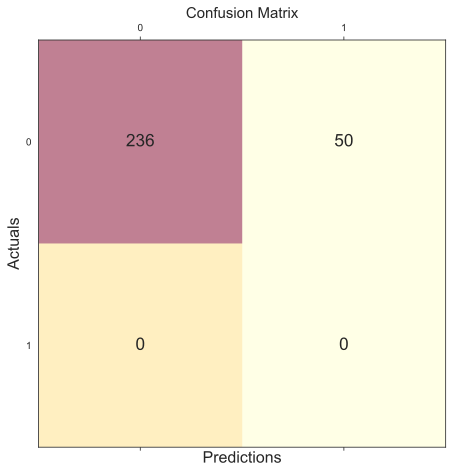

In [28]:
#logistics regression
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_ros, y_ros)
y_predict = model.predict(X_test)
labels = ['Non-Predicted', 'Predicted']
print(classification_report(y_test, y_predict, target_names=labels))

print('LgR_Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
mat_con = (confusion_matrix(y_test, y_predict,))


# Setting the attributes
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [29]:
#Here decision tree is algorithm is also used to determine accuracy and other values
decision_t = DecisionTreeClassifier(max_depth = 3, random_state=0)
decision_t.fit(X_ros, y_ros)
y_pred_decision_t = decision_t.predict(X_test)
#metrics.accuracy_score(y_test, y_pred_decision_t)
print(classification_report(y_test, y_pred_decision_t))
print('The accuracy score with using the decision tree classifier is :',accuracy_score(y_test,y_pred_decision_t))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.50      0.04      0.07        50

    accuracy                           0.83       286
   macro avg       0.66      0.52      0.49       286
weighted avg       0.77      0.83      0.76       286

The accuracy score with using the decision tree classifier is : 0.8251748251748252


In [30]:
#Here DT Tuning is done to increase accuracy 
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
dt_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned decision tree classifier is: ', dt_accuracy)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
The accuracy score with using the tuned decision tree classifier is:  0.8302712160979878


In [31]:
#Here Random forest algorythm is used 
random_f = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
random_f.fit(X_ros, y_ros)
y_pred_random_f = random_f.predict(X_test)

print(classification_report(y_test, y_pred_random_f))
print('The accuracy score with using the Random Forest is :',accuracy_score(y_test,y_pred_random_f))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.33      0.02      0.04        50

    accuracy                           0.82       286
   macro avg       0.58      0.51      0.47       286
weighted avg       0.74      0.82      0.75       286

The accuracy score with using the Random Forest is : 0.8216783216783217


In [32]:
#Using tuned Random forest to increase accuracy
params = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)

grid_search_cv.best_estimator_
grid_search_cv.best_params_
rf_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Random Forest is :',rf_accuracy)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
The accuracy score with using the tuned Random Forest is : 0.8355205599300087


In [33]:
#SVM Classifier
model = SVC(C=1,gamma = 0.001)
model.fit(X_ros, y_ros)
y_predict = model.predict(X_test)
Svm_Accuracy = accuracy_score(y_test, y_predict)
print("The accuracy score with using Svm_Accuracy is :", Svm_Accuracy)
print("Svm_F1 = " , f1_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

The accuracy score with using Svm_Accuracy is : 0.8251748251748252
Svm_F1 =  0.0
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       236
           1       0.00      0.00      0.00        50

    accuracy                           0.83       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.83      0.75       286



In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
#Tuning svm
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}

# Initialize the SVM classifier
model = SVC()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_predict = best_model.predict(X_test)

# Calculate and print accuracy, F1-score, and classification report
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)

print("Best parameters:", best_params)
print("Best accuracy:", accuracy)
print("Best F1-score:", f1)
print("Classification Report:\n", classification_rep)


Best parameters: {'C': 0.1, 'gamma': 0.001}
Best accuracy: 0.8251748251748252
Best F1-score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90       236
           1       0.00      0.00      0.00        50

    accuracy                           0.83       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.83      0.75       286



In [35]:
#MLP Classifier algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model = MLPClassifier(verbose = 0 , max_iter = 46 , random_state = 0)
model.fit(X_ros, y_ros)
y_predict = model.predict(X_test)
print("Mlp_Accuracy = " , accuracy_score(y_test, y_predict))
print("Mlp_F1 = " , f1_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Mlp_Accuracy =  0.8251748251748252
Mlp_F1 =  0.0
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       236
           1       0.00      0.00      0.00        50

    accuracy                           0.83       286
   macro avg       0.41      0.50      0.45       286
weighted avg       0.68      0.83      0.75       286



Feature importance ranking


1.Survey_id(0.162268)
2.Age(0.137146)
3.education_level(0.090803)
4.lasting_investment(0.088471)
5.living_expenses(0.083523)
6.no_lasting_investmen(0.078455)
7.Number_children(0.076425)
8.durable_asset(0.073336)
9.incoming_agricultural(0.071833)
10.other_expenses(0.071124)
11.Married(0.017143)
12.sex(0.013946)
13.incoming_salary(0.010158)
14.incoming_no_business(0.009962)
15.incoming_own_farm(0.009091)
16.incoming_business(0.006316)


<BarContainer object of 16 artists>

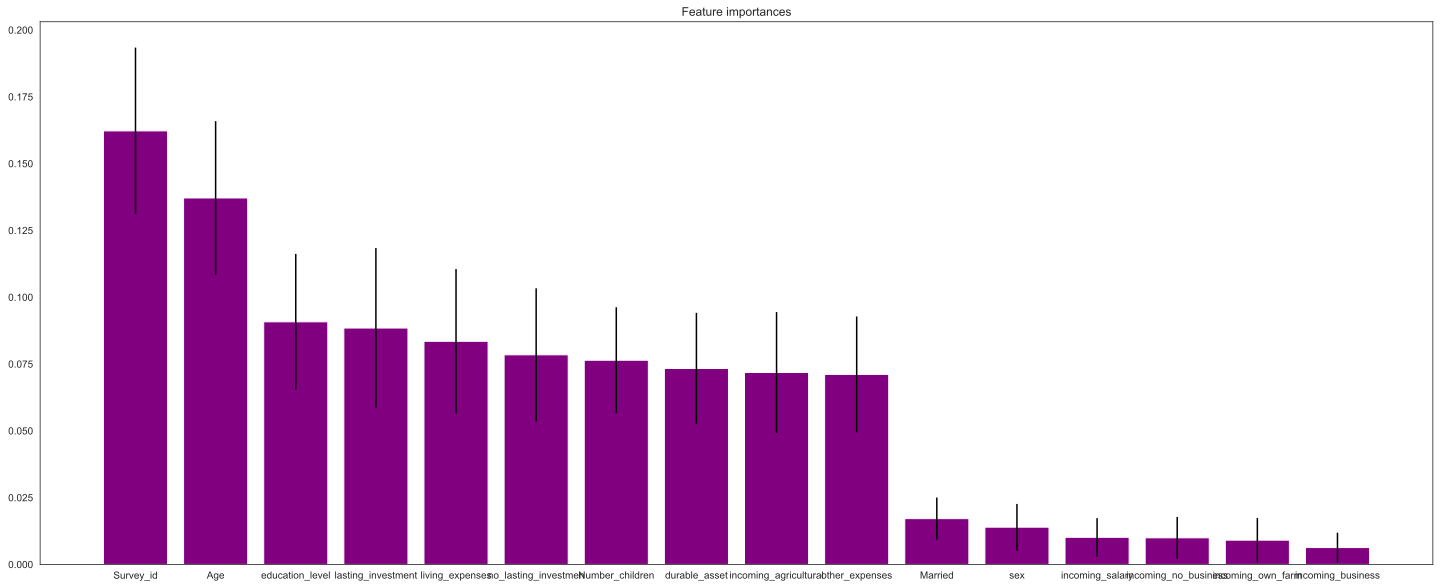

In [36]:
#Plotting Feature Importances
print('Feature importance ranking\n\n')
importances = random_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_f.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = depression_rec.columns
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(25, 10))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')

####      MODEL DEPLOYMENT

In [37]:
#Saving the tuned Random forest 
# Import joblib
paramsa = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), paramsa, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)
best_model = grid_search_cv.best_estimator_
grid_search_cv.best_params_
# Save the model as a pickle file
dump(best_model, 'best_model.joblib')

Fitting 3 folds for each of 54 candidates, totalling 162 fits


['best_model.joblib']

In [92]:
# Import joblib
from joblib import load

# Load the model from the file
model = load('best_model.joblib')

# Use the model to make predictions
new_input = X_test
y_pred = model.predict(X_test)
results = pd.DataFrame(new_input,y_pred)
results.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.289896,0.311334,-0.061083,0.553431,1.670691,0.437814,-0.295561,-0.857512,2.064007,-0.456339,-0.579034,2.892897,1.703239,-0.977597,0.061843,-1.546062
